In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report

# Models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading borderlineSmote-resampled dataset
df = pd.read_csv("../data/resampled_datas/resampled_borderlinesmote.csv")
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [3]:
# Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Defining models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

results = []


MODEL: Decision Tree
Accuracy: 0.8169
ROC-AUC: 0.8177
PR-AUC: 0.8659

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      1021
         1.0       0.83      0.81      0.82      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



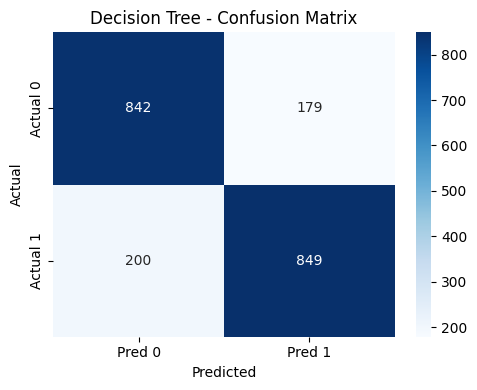


MODEL: XGBoost


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8498
ROC-AUC: 0.9359
PR-AUC: 0.9476

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1021
         1.0       0.86      0.84      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



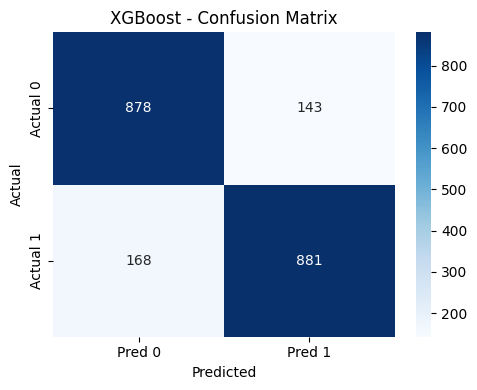


MODEL: KNN
Accuracy: 0.7821
ROC-AUC: 0.8343
PR-AUC: 0.8215

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76      1021
         1.0       0.74      0.88      0.80      1049

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



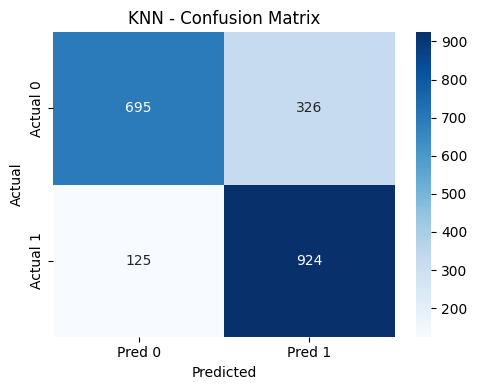


MODEL: Random Forest
Accuracy: 0.8531
ROC-AUC: 0.9373
PR-AUC: 0.9432

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1021
         1.0       0.88      0.82      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



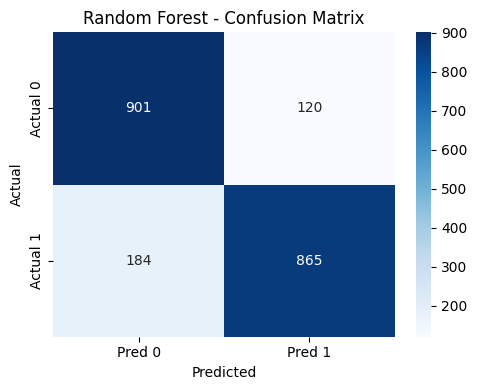


MODEL: Logistic Regression
Accuracy: 0.7667
ROC-AUC: 0.8423
PR-AUC: 0.8011

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75      1021
         1.0       0.74      0.83      0.78      1049

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


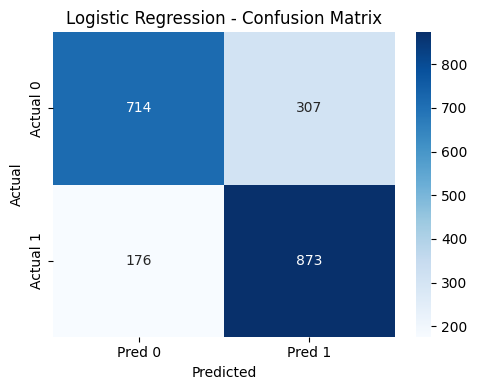


MODEL: SVM
Accuracy: 0.6507
ROC-AUC: 0.7094
PR-AUC: 0.7051

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62      1021
         1.0       0.64      0.72      0.68      1049

    accuracy                           0.65      2070
   macro avg       0.65      0.65      0.65      2070
weighted avg       0.65      0.65      0.65      2070



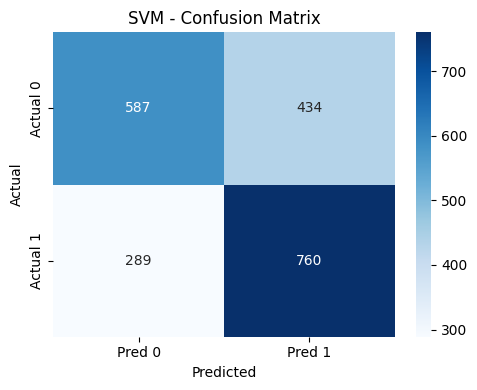


MODEL: Naive Bayes
Accuracy: 0.7522
ROC-AUC: 0.8227
PR-AUC: 0.7865

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.71      1021
         1.0       0.71      0.87      0.78      1049

    accuracy                           0.75      2070
   macro avg       0.77      0.75      0.75      2070
weighted avg       0.77      0.75      0.75      2070



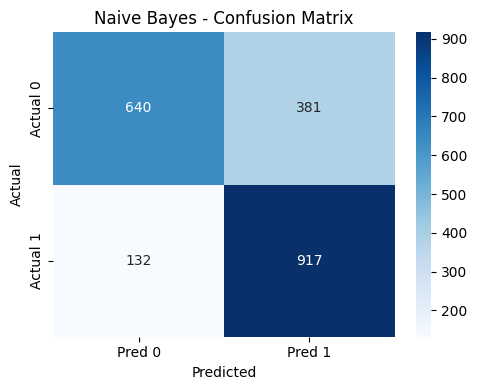

In [5]:
# Training and evaluating each model
for name, model in models.items():
    print(f"\nMODEL: {name}") 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculating performance metrics
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Storing results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc,
        "PR-AUC": pr_auc
    })

    # Ploting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [6]:
# Showing results as a DataFrame
df_results = pd.DataFrame(results)
print("\nModel Comparison (sorted by PR-AUC):")
print(df_results.sort_values(by="PR-AUC", ascending=False))


Model Comparison (sorted by PR-AUC):
                 Model  Accuracy   ROC-AUC    PR-AUC
1              XGBoost  0.849758  0.935864  0.947553
3        Random Forest  0.853140  0.937304  0.943183
0        Decision Tree  0.816908  0.817744  0.865891
2                  KNN  0.782126  0.834286  0.821508
4  Logistic Regression  0.766667  0.842263  0.801057
6          Naive Bayes  0.752174  0.822659  0.786511
5                  SVM  0.650725  0.709419  0.705136


In [7]:
df_results["Resampling"] = "Borderline Smote"

# Save to CSV
df_results.to_csv(f"../data/results/results_bs.csv", index=False)

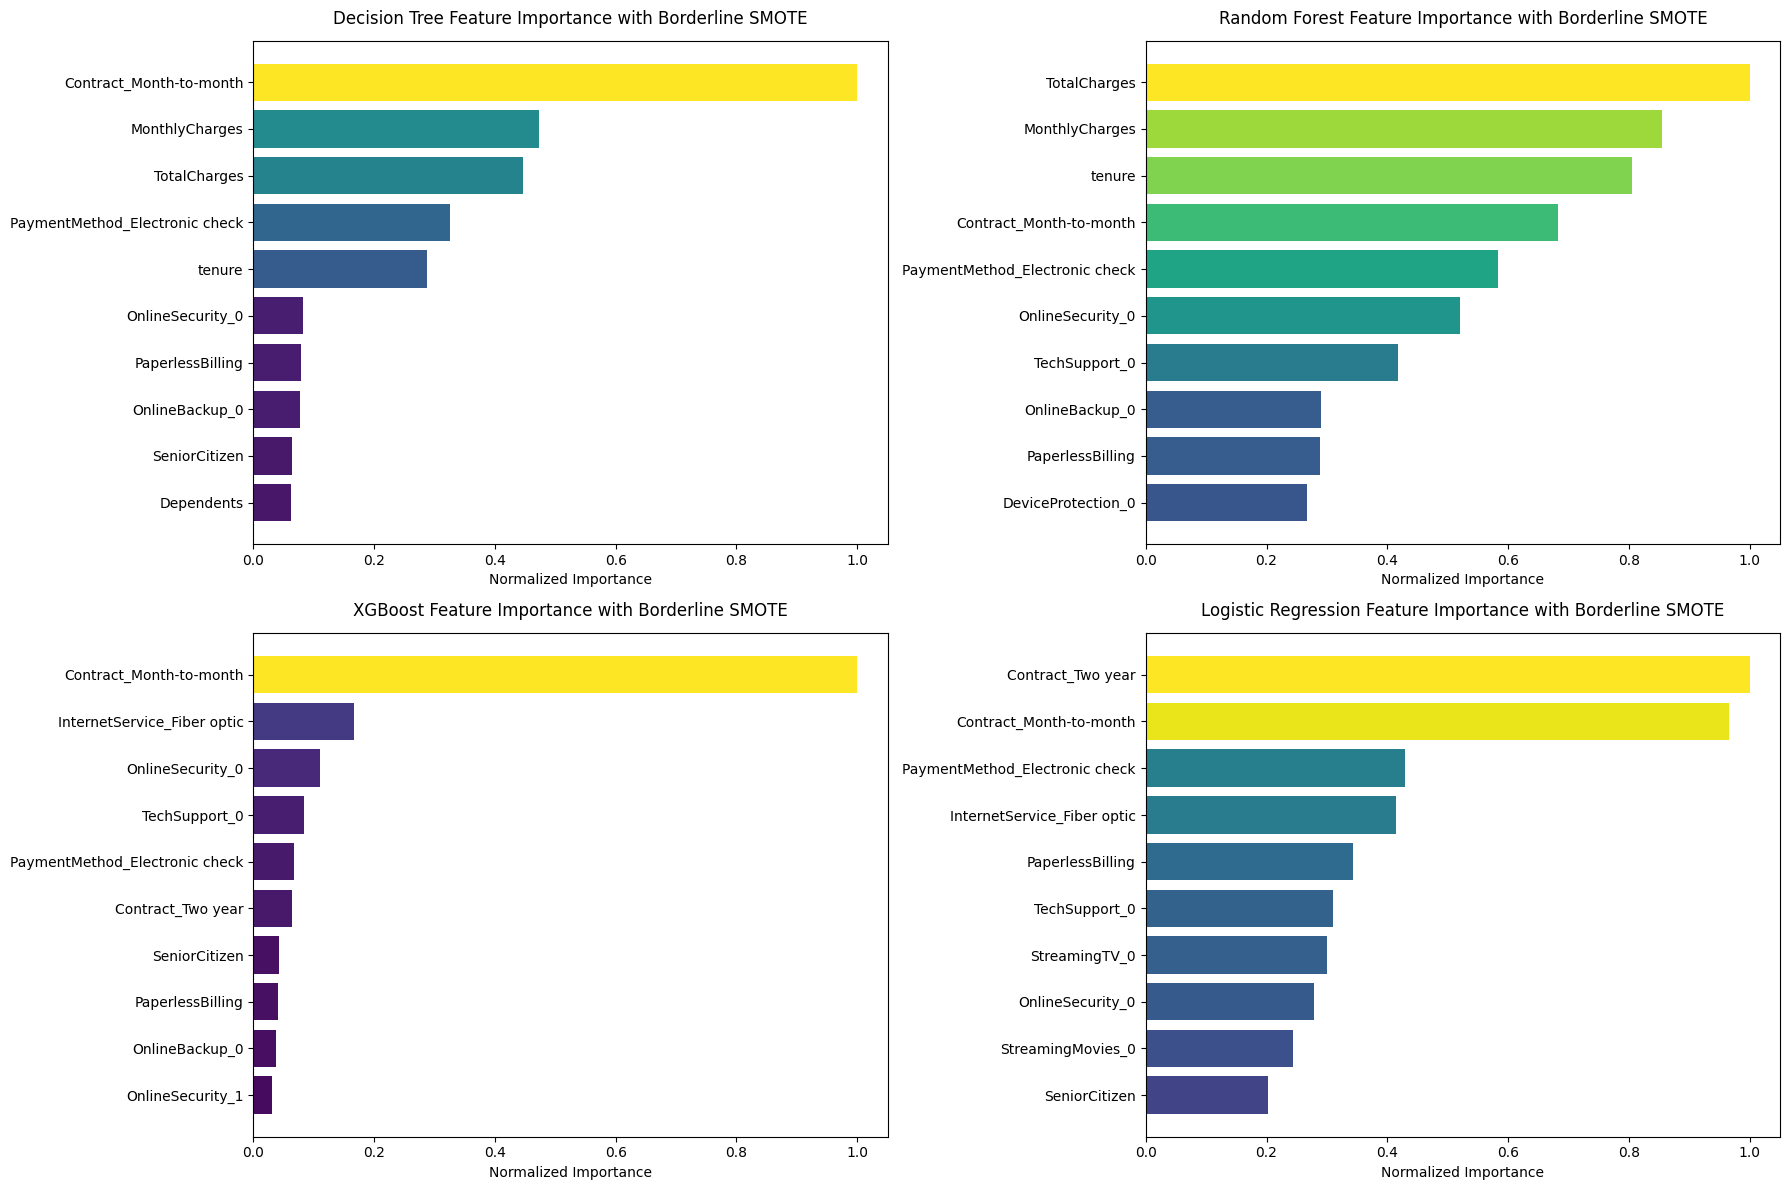

In [8]:
# Feature Importance 
import numpy as np
from sklearn.inspection import permutation_importance
from matplotlib import cm
import matplotlib.pyplot as plt


# Feature Importance calculation and visualization
plt.figure(figsize=(18, 12))
supported_models = {
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"],
    "XGBoost": models["XGBoost"],
    "Logistic Regression": models["Logistic Regression"]
}

for i, (name, model) in enumerate(supported_models.items(), 1):
    plt.subplot(2, 2, i)
    
    try:
        if name in ["Decision Tree", "Random Forest", "XGBoost"]:
            importances = model.feature_importances_
        elif name == "Logistic Regression":
            importances = np.abs(model.coef_[0])
        
        # Normalizaiton
        importances = (importances - importances.min()) / (importances.max() - importances.min() + 1e-10)
        feature_names = X.columns
        
        # Select Top 10 Feature
        top_idx = np.argsort(importances)[-10:]
        plt.barh(range(len(top_idx)), importances[top_idx], align='center', color=cm.viridis(importances[top_idx]))
        plt.yticks(range(len(top_idx)), [feature_names[i] for i in top_idx])
        plt.title(f'{name} Feature Importance with Borderline SMOTE', pad=12, fontsize=12)
        plt.xlabel('Normalized Importance', fontsize=10)
        
    except Exception as e:
        print(f"{name} coundn't calculated: {str(e)}")
        continue

plt.tight_layout()
plt.show()

In [9]:
#KNN Permutation results for feature importance

from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


                               Feature  Importance
5                       MonthlyCharges    0.182705
6                         TotalCharges    0.179179
3                               tenure    0.046570
4                     PaperlessBilling    0.001594
15                  DeviceProtection_0    0.001208
29      PaymentMethod_Electronic check    0.001159
10                    OnlineSecurity_0    0.000870
17                       TechSupport_0    0.000821
12  OnlineSecurity_No internet service    0.000821
14    OnlineBackup_No internet service    0.000821


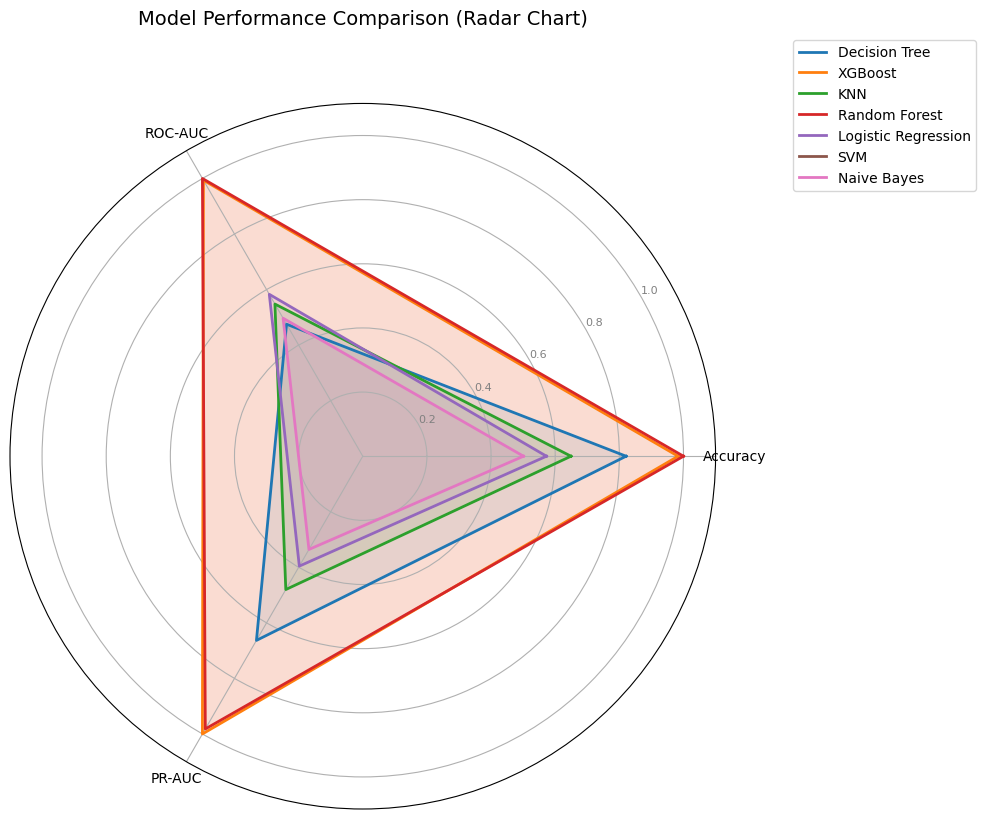

In [10]:
from math import pi

# Data for Radar chart
categories = ['Accuracy','ROC-AUC','PR-AUC']
df_radar = df_results.set_index('Model')[categories]

# Normalization
df_radar = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Radar chart:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

plt.xticks(angles := [i*2*pi/len(categories) for i in range(len(categories))], categories)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1.1)

# Each model:
colors = plt.cm.tab10.colors
for idx, (model, row) in enumerate(df_radar.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  
    ax.plot(angles + angles[:1], values, color=colors[idx], linewidth=2, linestyle='solid', label=model)
    ax.fill(angles + angles[:1], values, color=colors[idx], alpha=0.1)

plt.title('Model Performance Comparison (Radar Chart)', y=1.1, fontsize=14)
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.tight_layout()
plt.show()

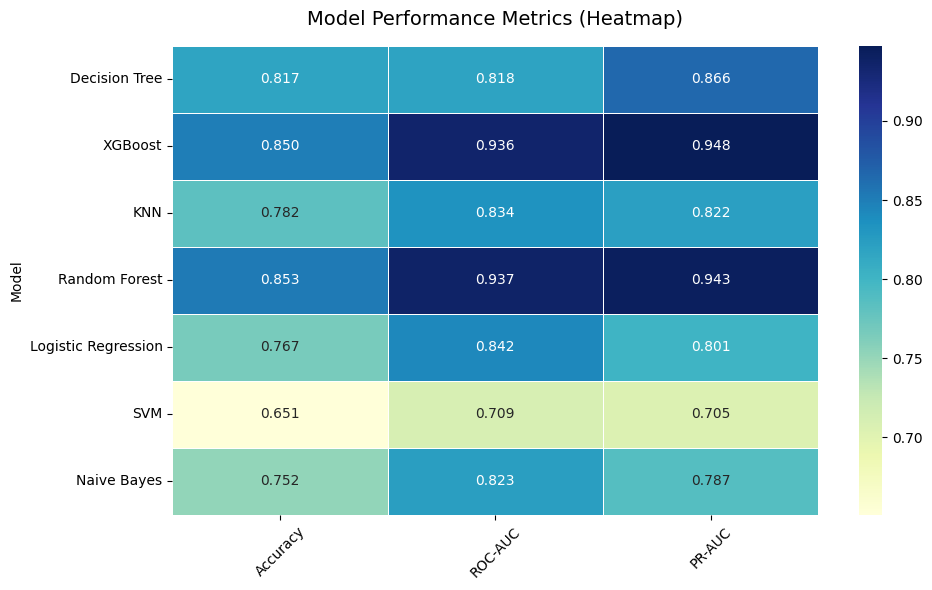

In [11]:
# Data for Heatmap
df_heat = df_results.set_index('Model')[['Accuracy', 'ROC-AUC', 'PR-AUC']]

plt.figure(figsize=(10, 6))
sns.heatmap(df_heat, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=.5)
plt.title('Model Performance Metrics (Heatmap)', pad=15, fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()